## **EDA Before Data Processing**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from textblob import TextBlob
import numpy as np

In [4]:
sns.set(style="whitegrid")

In [5]:
movies = pd.read_json('IMDB_movie_details.json', lines = True)
reviews = pd.read_json('IMDB_reviews.json', lines = True)
data = pd.merge(reviews, movies, on = 'movie_id')

data = data.rename(columns = {'rating_x': 'user_rating', 'rating_y': 'movie_rating'})

data

,review_date,movie_id,user_id,is_spoiler,review_text,user_rating,review_summary,plot_summary,duration,genre,movie_rating,release_date,plot_synopsis
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ..."
573902,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ..."
573903,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ..."
573904,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ..."


In [7]:
data['spoiler_label'] = data['is_spoiler'].map({False: 'Non-Spoiler', True: 'Spoiler'})

### Frequency of Spoiler vs Non-Spoiler Reviews

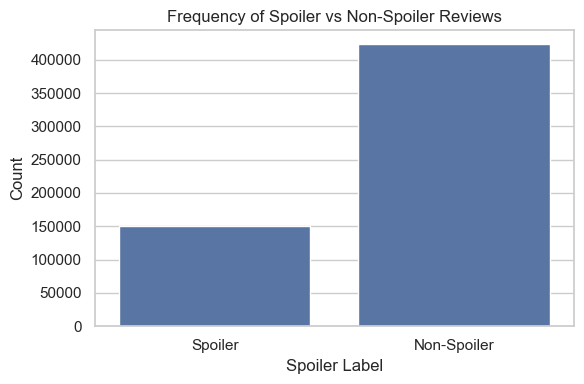

In [79]:
plt.figure(figsize = (6, 4))
sns.countplot(data = data, x = 'spoiler_label')
plt.title("Frequency of Spoiler vs Non-Spoiler Reviews")
plt.xlabel("Spoiler Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Frequently Used Words Word Cloud

In [3]:
def create_wc(text, title):
    word_cloud = WordCloud(width = 5000, height = 4000, background_color = 'white', colormap = 'tab10', max_words = 100).generate(text)
    plt.figure(figsize = (20,14))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

**All Reviews**

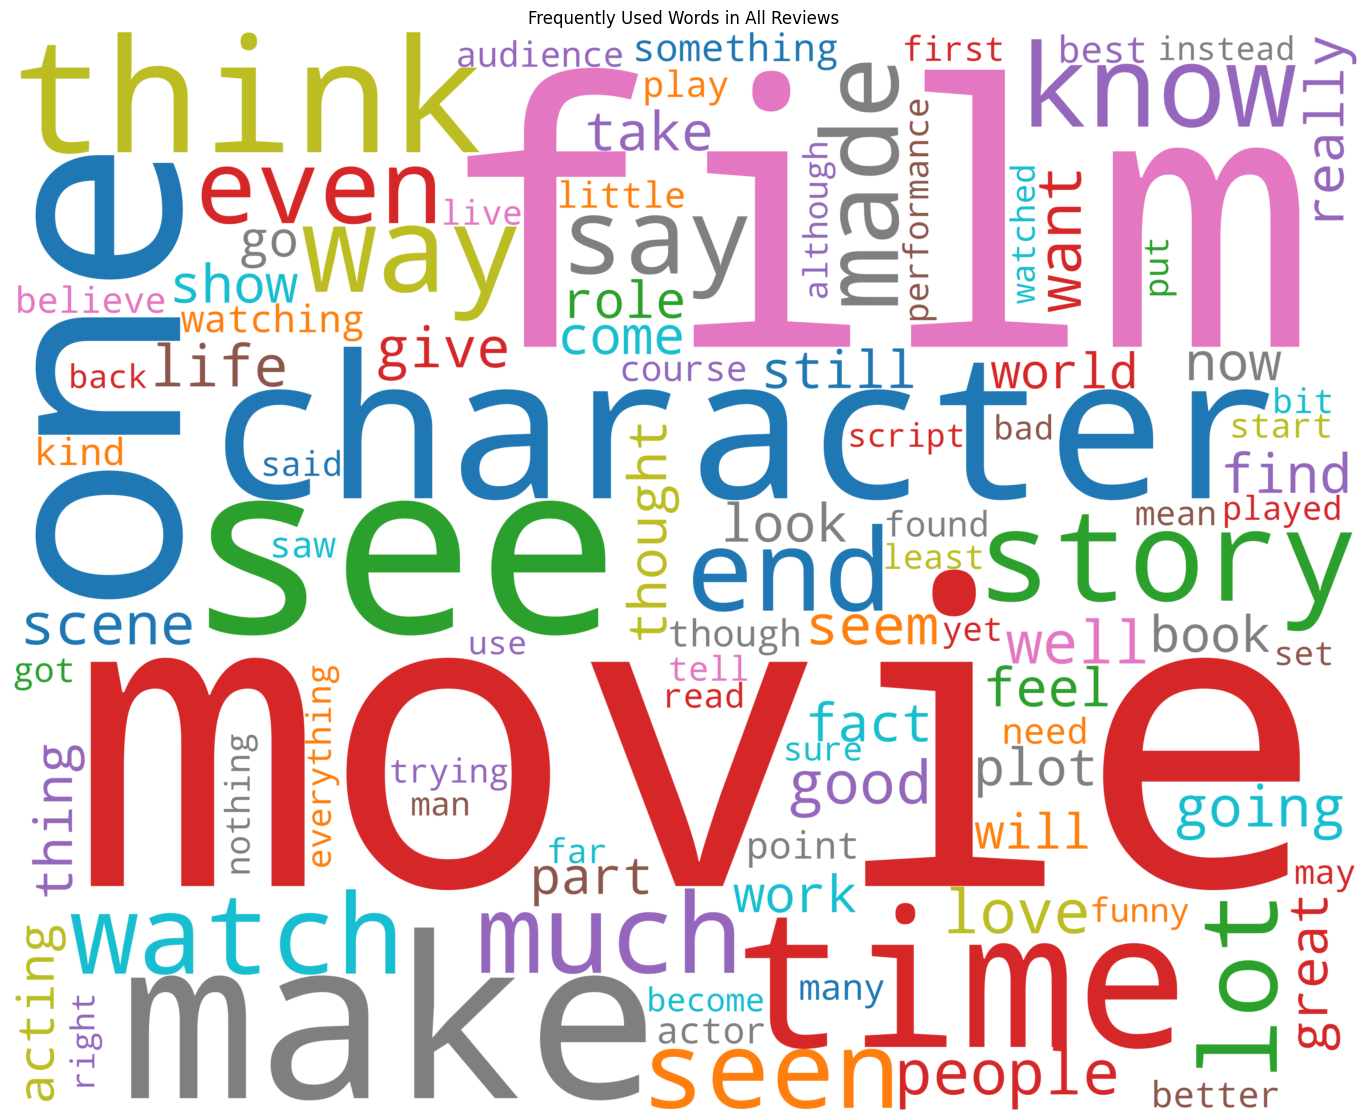

In [4]:
all_reviews = ' '.join(data['review_text'].astype(str))
create_wc(all_reviews, 'Frequently Used Words in All Reviews')

**Spoiler Reviews**

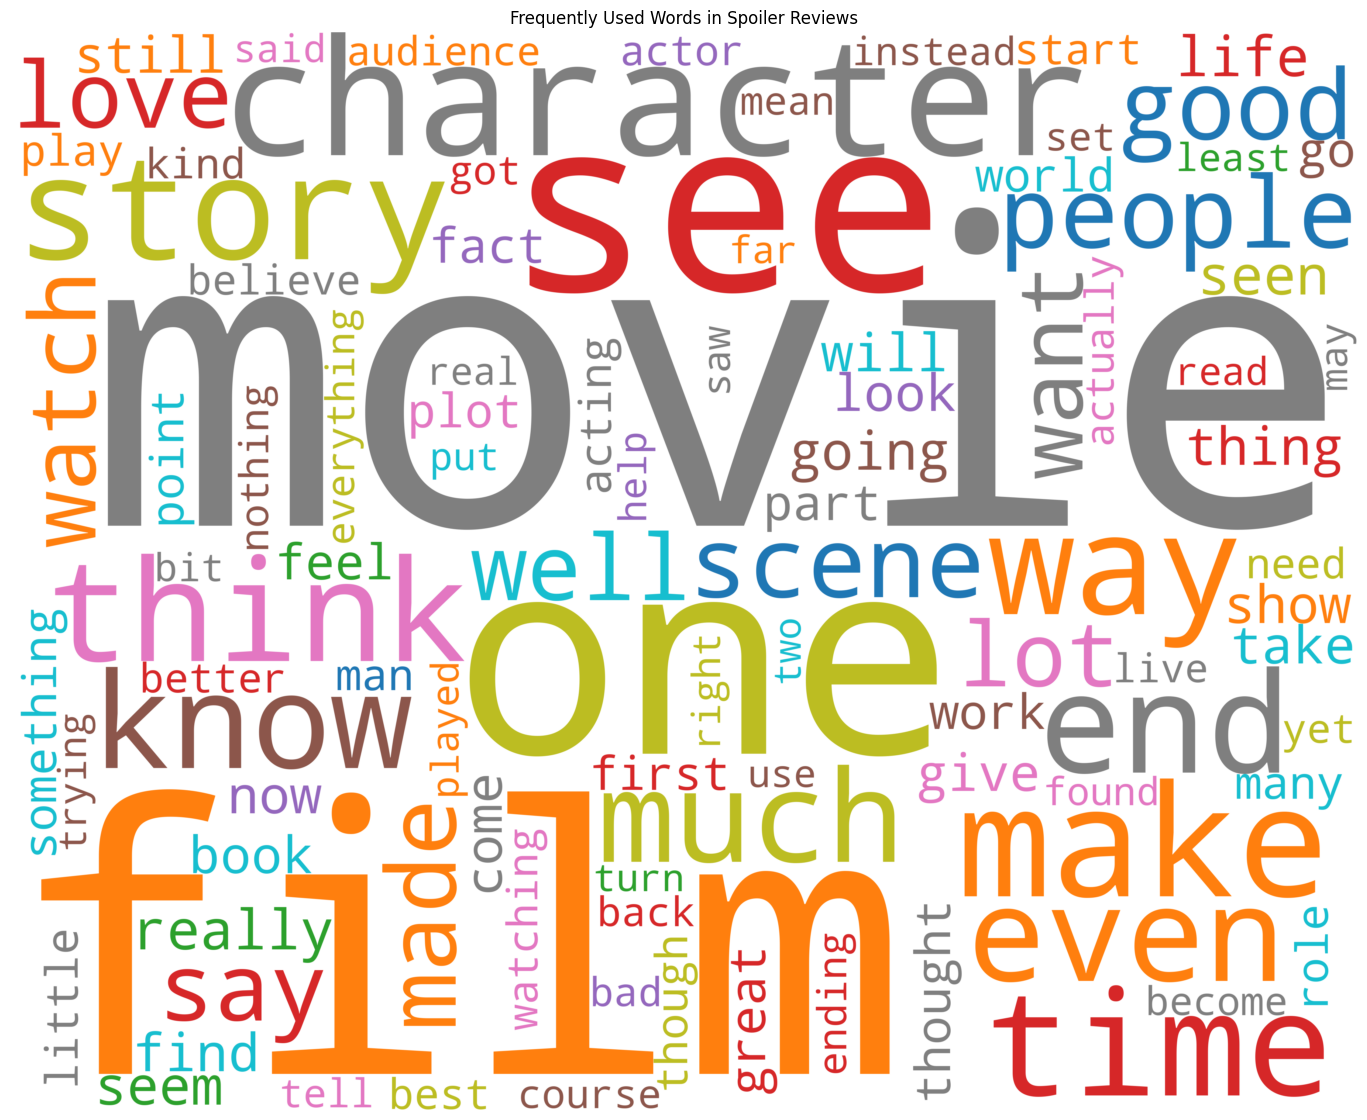

In [5]:
spoiler_data = data[data['is_spoiler'] == True]
spoiler_reviews = ' '.join(spoiler_data['review_text'].astype(str))
create_wc(spoiler_reviews, 'Frequently Used Words in Spoiler Reviews')


**Non-Spoiler Reviews**

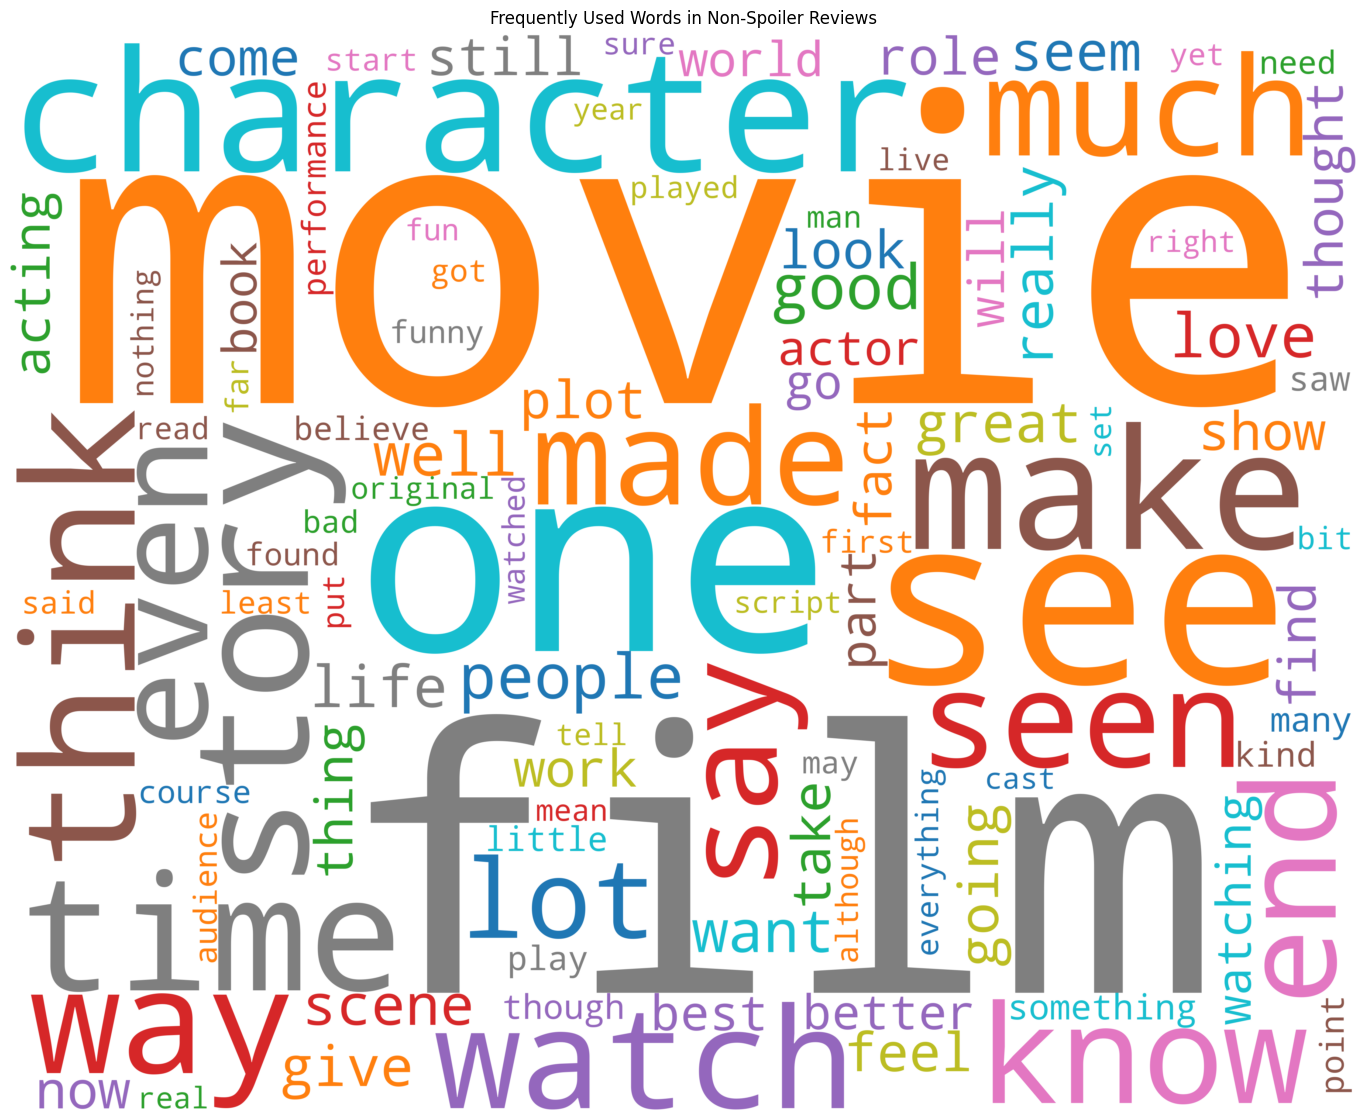

In [6]:
non_spoiler_data = data[data['is_spoiler'] == False]
non_spoiler_reviews = ' '.join(non_spoiler_data['review_text'].astype(str))
create_wc(non_spoiler_reviews, 'Frequently Used Words in Non-Spoiler Reviews')

### Review Word Counts Density Histogram

In [76]:
data['word_count'] = data['review_text'].astype(str).apply(lambda x: len(x.split()))

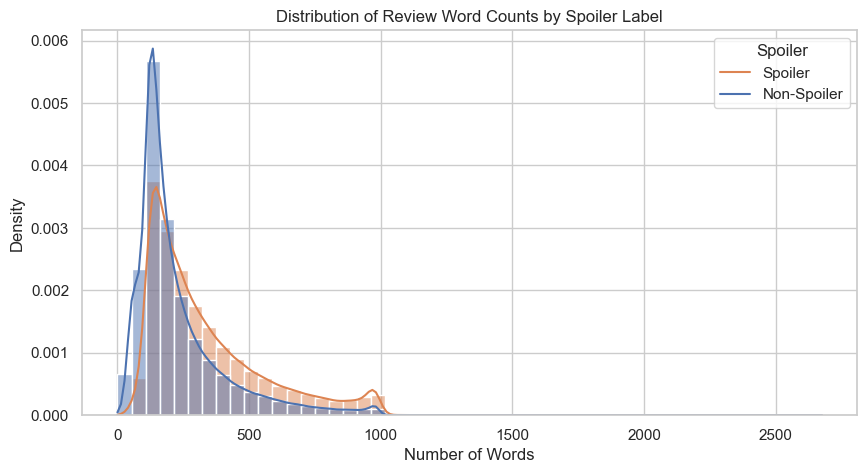

In [77]:
plt.figure(figsize = (10,5))
sns.histplot(
    data = data,
    x = 'word_count',
    bins = 50,
    kde = True,
    hue = 'is_spoiler',
    stat = 'density',   
    common_norm = False
)
plt.title('Distribution of Review Word Counts by Spoiler Label')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend(title = 'Spoiler', labels = ['Spoiler', 'Non-Spoiler'])
plt.show()


### Review Character Counts Density Histogram

In [74]:
data['char_count'] = data['review_text'].astype(str).apply(lambda x: len(x))

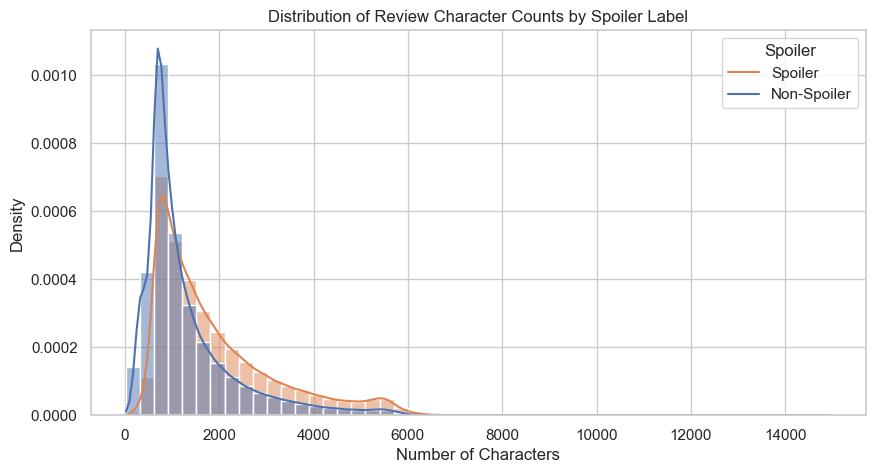

In [75]:
plt.figure(figsize = (10,5))
sns.histplot(
    data = data,
    x = 'char_count',
    bins = 50,
    kde = True,
    hue = 'is_spoiler',
    stat = 'density',   
    common_norm = False
)
plt.title('Distribution of Review Character Counts by Spoiler Label')
plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.legend(title = 'Spoiler', labels = ['Spoiler', 'Non-Spoiler'])
plt.show()


### Movie Rating Proportion Grouped Bar Chart

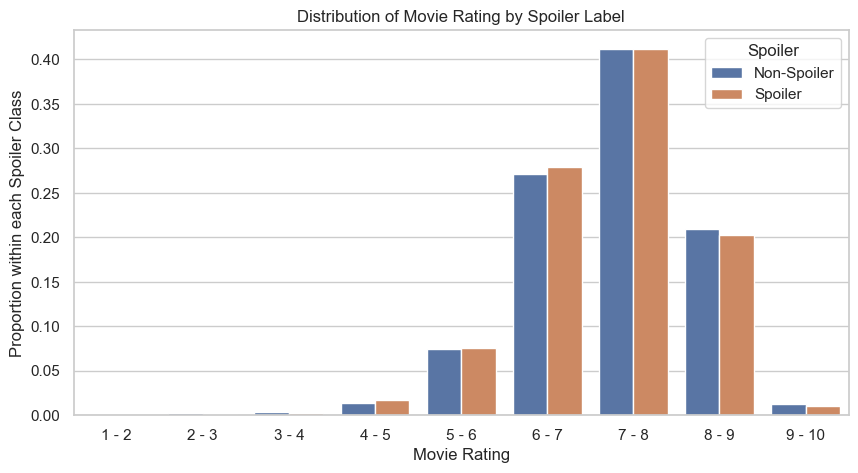

In [ ]:
data['movie_rating'] = pd.to_numeric(data['movie_rating'], errors = 'coerce')
data['movie_rating_bin'] = pd.cut(data['movie_rating'], bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                            labels = ['1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6', '6 - 7', '7 - 8', '8 - 9', '9 - 10'])
proportion = (data.groupby('spoiler_label')['movie_rating_bin']
                 .value_counts(normalize = True)
                 .rename('proportion')
                 .reset_index())

plt.figure(figsize = (10,5))
sns.barplot(data = proportion, x = 'movie_rating_bin', y = 'proportion', hue = 'spoiler_label')

plt.title('Distribution of Movie Rating by Spoiler Label')
plt.xlabel('Movie Rating')
plt.ylabel('Proportion within each Spoiler Class')
plt.legend(title = 'Spoiler')
plt.show()

### User Rating Proportion Grouped Bar Chart

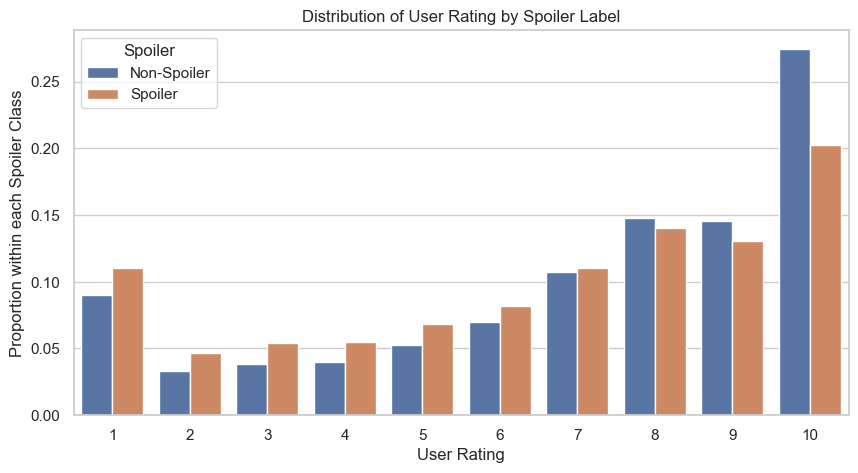

In [ ]:
data['user_rating'] = pd.to_numeric(data['user_rating'], errors = 'coerce')
proportion = (data.groupby('spoiler_label')['user_rating']
                 .value_counts(normalize = True)
                 .rename('proportion')
                 .reset_index())

plt.figure(figsize = (10,5))
sns.barplot(data = proportion, x = 'user_rating', y = 'proportion', hue = 'spoiler_label', order = sorted(proportion['user_rating'].dropna().unique()))

plt.title('Distribution of User Rating by Spoiler Label')
plt.xlabel('User Rating')
plt.ylabel('Proportion within each Spoiler Class')
plt.legend(title = 'Spoiler')
plt.show()

### Genre Proportion Grouped Bar Chart

In [133]:
# Multi-label Encoding Genre
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(
    mlb.fit_transform(data['genre']),
    columns = [f"genre_{g}" for g in mlb.classes_],
    index = data.index
)
data = pd.concat([data, genre_encoded], axis=1)

In [134]:
genre_columns = [column for column in data.columns if column.startswith("genre_")]
genre_columns = list(dict.fromkeys(genre_columns))
genre_sorted = data[genre_columns].sum().sort_values(ascending = False).index.tolist()

In [135]:
proportion = data.groupby("spoiler_label")[genre_sorted].mean().T
                
proportion.index = (
    pd.Index(proportion.index)
      .str.replace(r"^genre_", "", regex=True)
      .str.title()
)

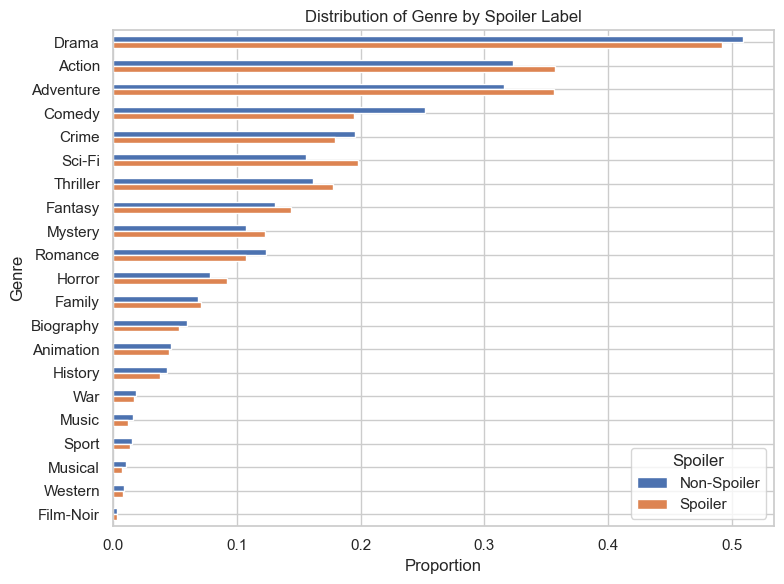

In [141]:
order = proportion.mean(axis = 1).sort_values(ascending = False).index
ax = proportion.loc[order].plot(kind = "barh", figsize = (8,6))
ax.invert_yaxis()  # Put largest at the top
ax.set_title("Distribution of Genre by Spoiler Label")
ax.set_xlabel("Proportion")
ax.set_ylabel("Genre")
ax.legend(title = "Spoiler")
plt.tight_layout()
plt.show()


### Polarity Histogram

In [8]:
data["polarity"] = data["review_text"].apply(lambda s: TextBlob(s).sentiment.polarity)

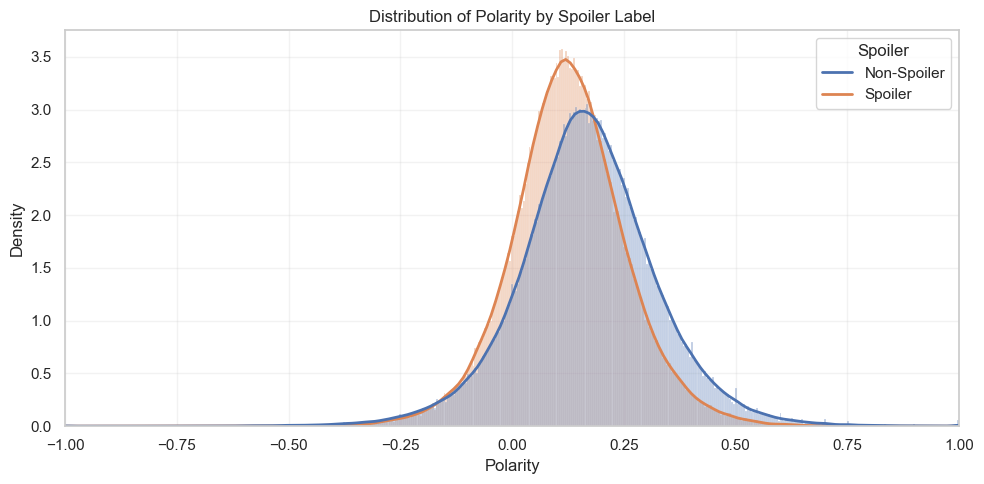

In [16]:
x0 = data.loc[data["is_spoiler"] == False, "polarity"].dropna()
x1 = data.loc[data["is_spoiler"] == True, "polarity"].dropna()
allx = pd.concat([x0, x1], ignore_index = True)

low, high = -1.0, 1.0
x0 = x0.clip(low, high)
x1 = x1.clip(low, high)
both = pd.concat([x0, x1], ignore_index = True)
bins = np.histogram_bin_edges(both, bins = "auto")

plot = pd.DataFrame({
    "polarity": np.concatenate([x0.values, x1.values]),
    "Spoiler": (["Non-Spoiler"] * len(x0)) + (["Spoiler"] * len(x1))
    })

plt.figure(figsize = (10,5))
sns.histplot(
        data = plot, x = "polarity", hue = "Spoiler",
        bins = bins, stat = "density", multiple = "layer",
        common_bins = True, common_norm = False,
        alpha = 0.35, edgecolor = None
    )


sns.kdeplot(
        data = plot, x = "polarity", hue = "Spoiler",
        common_norm = False, fill = False, lw = 2
    )

plt.xlim(low, high)
plt.title('Distribution of Polarity by Spoiler Label')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.grid(True, alpha = 0.25)
plt.tight_layout()
plt.show()

### Subjectivity Histogram

In [17]:
data["subjectivity"] = data["review_text"].apply(lambda s: TextBlob(s).sentiment.subjectivity)

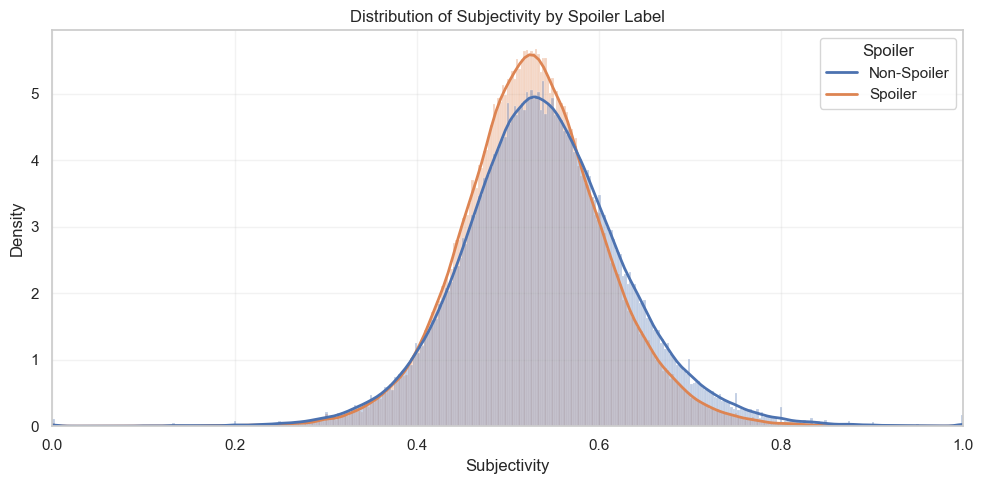

In [18]:
x0 = data.loc[data["is_spoiler"] == False, "subjectivity"].dropna()
x1 = data.loc[data["is_spoiler"] == True, "subjectivity"].dropna()
allx = pd.concat([x0, x1], ignore_index = True)

low, high = 0.0, 1.0
x0 = x0.clip(low, high)
x1 = x1.clip(low, high)
both = pd.concat([x0, x1], ignore_index = True)
bins = np.histogram_bin_edges(both, bins = "auto")

plot = pd.DataFrame({
    "subjectivity": np.concatenate([x0.values, x1.values]),
    "Spoiler": (["Non-Spoiler"] * len(x0)) + (["Spoiler"] * len(x1))
    })

plt.figure(figsize = (10,5))
sns.histplot(
        data = plot, x = "subjectivity", hue = "Spoiler",
        bins = bins, stat = "density", multiple = "layer",
        common_bins = True, common_norm = False,
        alpha = 0.35, edgecolor = None
    )


sns.kdeplot(
        data = plot, x = "subjectivity", hue = "Spoiler",
        common_norm = False, fill = False, lw = 2
    )

plt.xlim(low, high)
plt.title('Distribution of Subjectivity by Spoiler Label')
plt.xlabel('Subjectivity')
plt.ylabel('Density')
plt.grid(True, alpha = 0.25)
plt.tight_layout()
plt.show()

### Spoiler Rate Over Time (Yearly) Line Graph

In [29]:
data['release_date'] = pd.to_datetime(data['release_date'], errors ='coerce')
df_year = data.dropna(subset = ['release_date']).copy()
df_year['year'] = df_year['release_date'].dt.year

In [31]:
df_year['spoiler_numeric'] = df_year['spoiler_label'].map({'Non-Spoiler': 0, 'Spoiler': 1})
yearly_spoiler_rate = df_year.groupby('year')['spoiler_numeric'].mean().reset_index()

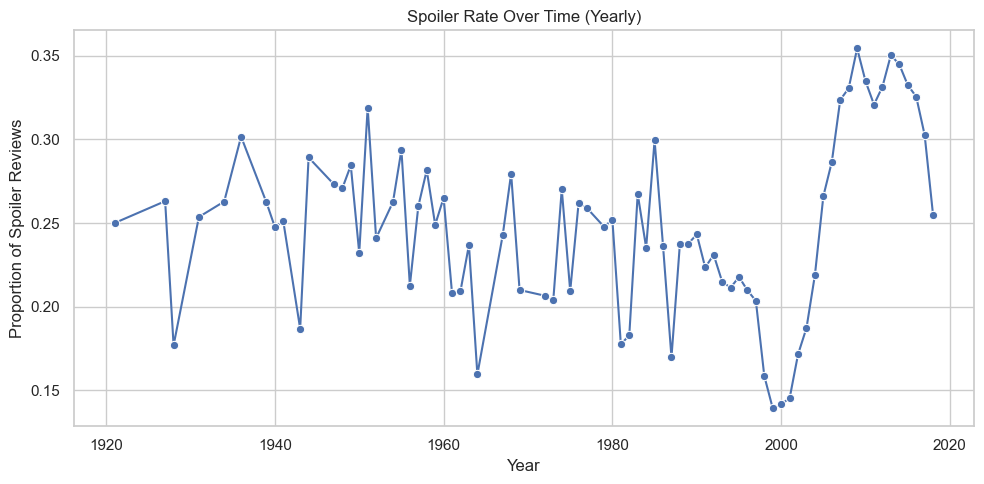

In [32]:
plt.figure(figsize = (10,5))
sns.lineplot(data = yearly_spoiler_rate, x = 'year', y = 'spoiler_numeric', marker = 'o')
plt.title('Spoiler Rate Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Proportion of Spoiler Reviews')
plt.tight_layout()
plt.show()
